<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Info 6105 Midterm Project</h1>

Northeastern University

INFO-6105-Data Science Engineering Methods and Tools

Professor Ebrahim Nasrabadi

Created by: Shuxin Li, Ruoxin Wang, Yanxuan Wang, Tong Li 

Date: Nov 5, 2021

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


## Dataset Dictionary

This home dataset contains house sale prices for King County, which includes Seattle. It includes 
homes sold between May 2014 and May 2015. The dataset consists of following variables:

- id - Unique ID for each home sold 
- date - Date of the home sale 
- price - Price of each home sold 
- bedrooms - Number of bedrooms 
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
- sqft_living - Square footage of the apartments interior living space 
- sqft_lot - Square footage of the land space 
- floors - Number of floors 
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 
- view - An index from 0 to 4 of how good the view of the property was 
- condition - An index from 1 to 5 on the condition of the apartment, 
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 
- sqft_above - The square footage of the interior housing space that is above ground level sqft_basement - The square footage of the interior housing space that is below ground level 
- yr_built - The year the house was initially built 
- yr_renovated - The year of the house’s last renovation 
- zipcode - What zipcode area the house is in 
- lat - Lattitude 
- long - Longitude 
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

## Importing datasets

In [1]:
# importing libraries
import numpy as np # mathematical essentials
import pandas as pd # data science essentials

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
import sklearn.linear_model # linear models

# from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score # train/test split
from sklearn.linear_model import LinearRegression, RidgeClassifier, LogisticRegression
#from sklearn.metrics import log_loss, accuracy_score
#from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.metrics import confusion_matrix, recall_score, precision_score
#from sklearn.calibration import calibration_curve
from sklearn.preprocessing import binarize, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


In [2]:
# loading training dataset
home_training = pd.read_csv('training_dataset.csv')
home_training.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3787000140,20140901T000000,450000,3,2.25,1780,9969,1.0,0,0,...,8,1450,330,1985,0,98034,47.7286,-122.168,1950,7974
1,1934800078,20140930T000000,430000,2,2.25,1040,1516,2.0,0,0,...,8,1040,0,2008,0,98122,47.6037,-122.307,1560,1920
2,7331900290,20140731T000000,230000,4,1.50,1520,8800,1.0,0,0,...,7,1520,0,1960,0,98002,47.3136,-122.208,1370,8800
3,3438500798,20140715T000000,275000,3,1.50,1060,6954,1.0,0,0,...,6,1060,0,1983,0,98106,47.5498,-122.355,1560,6954
4,2697400020,20141031T000000,400000,3,2.00,1350,7216,1.0,0,0,...,7,1350,0,1964,0,98177,47.7616,-122.365,1920,7600


In [3]:
# loading testing dataset
home_testing = pd.read_csv('test_dataset.csv')
home_testing.head()




,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6825100015,20140604T000000,2,1.75,1500,6800,1.0,0,0,4,7,910,590,1942,0,98117,47.7004,-122.371,1450,6800
1,1698900195,20140902T000000,3,2.00,1880,3000,1.0,0,0,4,8,1040,840,1931,0,98109,47.6418,-122.351,1790,3000
2,2848700585,20150424T000000,1,1.00,810,5000,1.0,0,1,3,7,590,220,1936,0,98106,47.5696,-122.360,1920,5000
3,2597690050,20150409T000000,4,1.75,1770,7336,1.0,0,0,4,8,1770,0,1986,0,98058,47.4265,-122.163,2030,8183
4,8944600200,20140623T000000,3,2.50,1900,3255,2.0,0,0,3,8,1900,0,1988,2000,98007,47.6075,-122.147,1880,3350


In [4]:
# checking the dtypes of datasets
home_training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17614 non-null  int64  
 1   date           17614 non-null  object 
 2   price          17614 non-null  int64  
 3   bedrooms       17614 non-null  int64  
 4   bathrooms      17614 non-null  float64
 5   sqft_living    17614 non-null  int64  
 6   sqft_lot       17614 non-null  int64  
 7   floors         17614 non-null  float64
 8   waterfront     17614 non-null  int64  
 9   view           17614 non-null  int64  
 10  condition      17614 non-null  int64  
 11  grade          17614 non-null  int64  
 12  sqft_above     17614 non-null  int64  
 13  sqft_basement  17614 non-null  int64  
 14  yr_built       17614 non-null  int64  
 15  yr_renovated   17614 non-null  int64  
 16  zipcode        17614 non-null  int64  
 17  lat            17614 non-null  float64
 18  long  

In [5]:
# checking null variables
home_testing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3999 non-null   int64  
 1   date           3999 non-null   object 
 2   bedrooms       3999 non-null   int64  
 3   bathrooms      3999 non-null   float64
 4   sqft_living    3999 non-null   int64  
 5   sqft_lot       3999 non-null   int64  
 6   floors         3999 non-null   float64
 7   waterfront     3999 non-null   int64  
 8   view           3999 non-null   int64  
 9   condition      3999 non-null   int64  
 10  grade          3999 non-null   int64  
 11  sqft_above     3999 non-null   int64  
 12  sqft_basement  3999 non-null   int64  
 13  yr_built       3999 non-null   int64  
 14  yr_renovated   3999 non-null   int64  
 15  zipcode        3999 non-null   int64  
 16  lat            3999 non-null   float64
 17  long           3999 non-null   float64
 18  sqft_liv

## Step 1. A summary statistic of the data

- bedrooms max is 33, it might be a typo, we need to look this row
- yr_built is from 1900 to 2015, we might need to encoding this features since it might with high cardinality later
- yr_renovated is from 0 to 2015, we need to check that variable specifically
- id, zipcode need to change the datatype

In [6]:
# descriptive statics for numeric data
home_training.describe(include = 'number').round(decimals = 2).transpose()


,count,mean,std,min,25%,50%,75%,max
id,17614.0,4.569068e+09,2.869570e+09,1000102.00,2.122052e+09,3.904985e+09,7.300200e+09,9.900000e+09
price,17614.0,5.408514e+05,3.685506e+05,75000.00,3.225000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,17614.0,3.370000e+00,9.400000e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,17614.0,2.110000e+00,7.700000e-01,0.00,1.500000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,17614.0,2.080920e+03,9.238600e+02,290.00,1.420000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,17614.0,1.513310e+04,4.194362e+04,520.00,5.053250e+03,7.607000e+03,1.065000e+04,1.651359e+06
floors,17614.0,1.500000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,17614.0,1.000000e-02,8.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,17614.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,17614.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Step 2. Preprocessing and data cleaning (if needed)

### checking bedrooms with 33 rooms
- it seems that it's a typo so we drop that row

In [7]:
home_training[home_training['bedrooms'] == 33]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2700,2402100895,20140625T000000,640000,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [8]:
home_training = home_training.drop(home_training.index[2700])

### checking for duplicate rows

- we have checked that some of the houses were sold twice so we should keep the duplicates

In [9]:
# checking for duplicates
houseIDcount = home_training.groupby('id')['date'].count()
houseIDcount = houseIDcount.sort_values(ascending = False)
houseIDcount[0:5]


id
3293700496    2
109200390     2
7856400240    2
4443800385    2
7856400300    2
Name: date, dtype: int64

In [10]:
# those homes sold twice, diff year & diff price
home_training[home_training['id'] == 5417600130]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3605,5417600130,20150512T000000,301000,2,1.0,910,9000,1.0,0,0,...,5,910,0,1923,0,98065,47.526,-121.81,1290,9000
16750,5417600130,20141010T000000,244500,2,1.0,910,9000,1.0,0,0,...,5,910,0,1923,0,98065,47.526,-121.81,1290,9000


### Converting date to specific year/month/day

In [11]:
# convert date to year&month&day
home_training['date'] = pd.to_datetime(home_training['date'])
home_training['year'] = home_training['date'].apply(lambda date:date.year)
home_training['month'] = home_training['date'].apply(lambda date:date.month)
home_training['day'] = home_training['date'].apply(lambda date:date.day)

# droping date column
home_training = home_training.drop('date',axis=1)


In [12]:
# convert date to year&month&day
home_testing['date'] = pd.to_datetime(home_testing['date'])
home_testing['year'] = home_testing['date'].apply(lambda date:date.year)
home_testing['month'] = home_testing['date'].apply(lambda date:date.month)
home_testing['day'] = home_testing['date'].apply(lambda date:date.day)

# droping date column
home_testing = home_testing.drop('date',axis=1)


### Coverting some variables to object type

In [13]:
# change some variables to object type
home_training['id'] = home_training.id.astype(object)
home_training['waterfront'] = home_training.waterfront.astype(object)
home_training['view'] = home_training.view.astype(object)
home_training['condition'] = home_training.condition.astype(object)
home_training['grade'] = home_training.grade.astype(object)
home_training['yr_built'] = home_training.yr_built.astype(object)
home_training['yr_renovated'] = home_training.yr_renovated.astype(object)
home_training['zipcode'] = home_training.zipcode.astype(object)
home_training['year'] = home_training.year.astype(object)
home_training['month'] = home_training.month.astype(object)
home_training['day'] = home_training.day.astype(object)
home_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17613 entries, 0 to 17613
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17613 non-null  object 
 1   price          17613 non-null  int64  
 2   bedrooms       17613 non-null  int64  
 3   bathrooms      17613 non-null  float64
 4   sqft_living    17613 non-null  int64  
 5   sqft_lot       17613 non-null  int64  
 6   floors         17613 non-null  float64
 7   waterfront     17613 non-null  object 
 8   view           17613 non-null  object 
 9   condition      17613 non-null  object 
 10  grade          17613 non-null  object 
 11  sqft_above     17613 non-null  int64  
 12  sqft_basement  17613 non-null  int64  
 13  yr_built       17613 non-null  object 
 14  yr_renovated   17613 non-null  object 
 15  zipcode        17613 non-null  object 
 16  lat            17613 non-null  float64
 17  long           17613 non-null  float64
 18  sqft_l

In [14]:
home_testing['id'] = home_testing.id.astype(object)
home_testing['waterfront'] = home_testing.waterfront.astype(object)
home_testing['view'] = home_testing.view.astype(object)
home_testing['condition'] = home_testing.condition.astype(object)
home_testing['grade'] = home_testing.grade.astype(object)
home_testing['yr_built'] = home_testing.yr_built.astype(object)
home_testing['yr_renovated'] = home_testing.yr_renovated.astype(object)
home_testing['zipcode'] = home_testing.zipcode.astype(object)
home_testing['year'] = home_testing.year.astype(object)
home_testing['month'] = home_testing.month.astype(object)
home_testing['day'] = home_testing.day.astype(object)
home_testing.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3999 non-null   object 
 1   bedrooms       3999 non-null   int64  
 2   bathrooms      3999 non-null   float64
 3   sqft_living    3999 non-null   int64  
 4   sqft_lot       3999 non-null   int64  
 5   floors         3999 non-null   float64
 6   waterfront     3999 non-null   object 
 7   view           3999 non-null   object 
 8   condition      3999 non-null   object 
 9   grade          3999 non-null   object 
 10  sqft_above     3999 non-null   int64  
 11  sqft_basement  3999 non-null   int64  
 12  yr_built       3999 non-null   object 
 13  yr_renovated   3999 non-null   object 
 14  zipcode        3999 non-null   object 
 15  lat            3999 non-null   float64
 16  long           3999 non-null   float64
 17  sqft_living15  3999 non-null   int64  
 18  sqft_lot

In [15]:
# checking dataset
#home_training.head()

In [16]:
# checking dataset
#home_testing.head()

## Step 3. Feature Engineering

<AxesSubplot:xlabel='day', ylabel='price'>

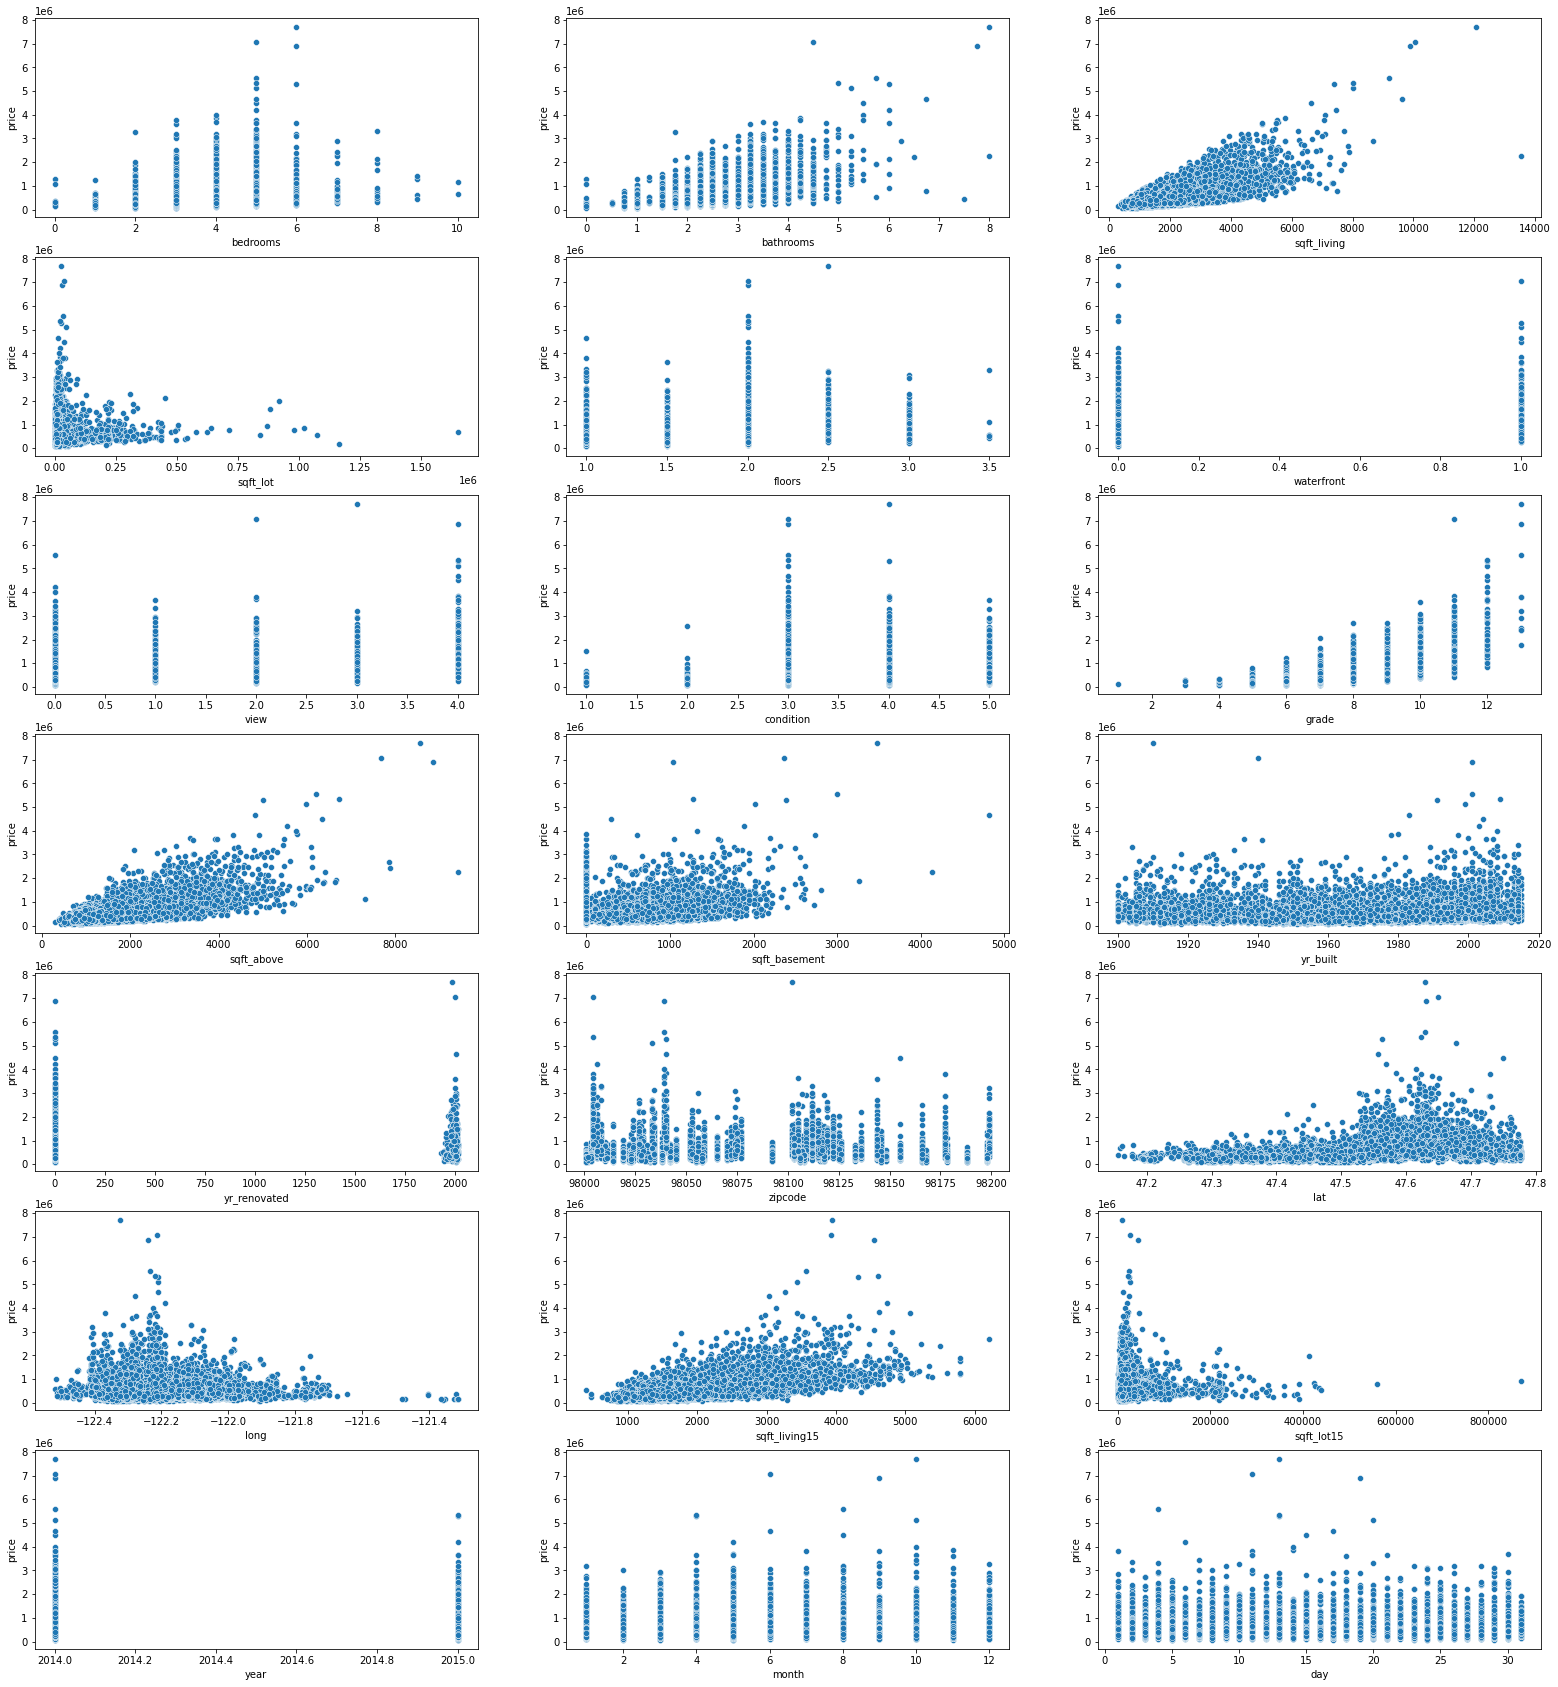

In [17]:
# scatterplot of variables
fig, ax = plt.subplots(figsize = (27,30), ncols = 3, nrows = 7)
sns.scatterplot(x = "bedrooms", y = "price",data = home_training, ax = ax[0][0])
sns.scatterplot(x="bathrooms", y="price",data=home_training, ax=ax[0][1])
sns.scatterplot(x="sqft_living", y="price",data=home_training, ax=ax[0][2])
sns.scatterplot(x="sqft_lot", y="price",data=home_training, ax=ax[1][0])
sns.scatterplot(x="floors", y="price",data=home_training, ax=ax[1][1])
sns.scatterplot(x="waterfront", y="price",data=home_training, ax=ax[1][2])
sns.scatterplot(x="view", y="price",data=home_training, ax=ax[2][0])
sns.scatterplot(x="condition", y="price",data=home_training, ax=ax[2][1])
sns.scatterplot(x="grade", y="price",data=home_training, ax=ax[2][2])
sns.scatterplot(x="sqft_above", y="price",data=home_training, ax=ax[3][0])
sns.scatterplot(x="sqft_basement", y="price",data=home_training, ax=ax[3][1])
sns.scatterplot(x="yr_built", y="price",data=home_training, ax=ax[3][2])
sns.scatterplot(x="yr_renovated", y="price",data=home_training, ax=ax[4][0])
sns.scatterplot(x="zipcode", y="price",data=home_training, ax=ax[4][1])
sns.scatterplot(x="lat", y="price",data=home_training, ax=ax[4][2])
sns.scatterplot(x="long", y="price",data=home_training, ax=ax[5][0])
sns.scatterplot(x="sqft_living15", y="price",data=home_training, ax=ax[5][1])
sns.scatterplot(x="sqft_lot15", y="price",data=home_training, ax=ax[5][2])
sns.scatterplot(x="year", y="price",data=home_training, ax=ax[6][0])
sns.scatterplot(x="month", y="price",data=home_training, ax=ax[6][1])
sns.scatterplot(x="day", y="price",data=home_training, ax=ax[6][2])

#plt.show();

In [18]:
# check the hist distribution of our variables

#home_training.hist(figsize=(18,15), bins='auto');


## Step 4. Encoding categorical features and in particular features with high cardinality

### Merge column ‘yr_renovated’

In [19]:
home_training.loc[(home_training['yr_renovated'] == 0), 'yr_renovated'] = 0
home_training.loc[(home_training['yr_renovated'] > 0), 'yr_renovated'] = 1


In [20]:
home_testing.loc[(home_testing['yr_renovated'] == 0), 'yr_renovated'] = 0
home_testing.loc[(home_testing['yr_renovated'] > 0), 'yr_renovated'] = 1


In [21]:
home_training.groupby('yr_renovated')['id'].count()


yr_renovated
0    16900
1      713
Name: id, dtype: int64

In [22]:
home_testing.groupby('yr_renovated')['id'].count()


yr_renovated
0    3798
1     201
Name: id, dtype: int64

In [23]:
home_training.groupby('yr_built')['id'].count()

yr_built
1900     68
1901     22
1902     26
1903     39
1904     36
       ... 
2011    105
2012    140
2013    162
2014    442
2015     31
Name: id, Length: 116, dtype: int64

In [24]:
home_training.loc[(home_training['yr_built'] <= 1950), 'yr_built_devel'] = 1
home_training.loc[(home_training['yr_built'] > 1950) & (home_training['yr_built'] <= 1975), 'yr_built_devel'] = 2
home_training.loc[(home_training['yr_built'] > 1975) & (home_training['yr_built'] <= 1997), 'yr_built_devel'] = 3
home_training.loc[(home_training['yr_built'] > 1997) , 'yr_built_devel'] = 4



In [25]:
home_testing.loc[(home_testing['yr_built'] <= 1950), 'yr_built_devel'] = 1
home_testing.loc[(home_testing['yr_built'] > 1950) & (home_testing['yr_built'] <= 1975), 'yr_built_devel'] = 2
home_testing.loc[(home_testing['yr_built'] > 1975) & (home_testing['yr_built'] <= 1997), 'yr_built_devel'] = 3
home_testing.loc[(home_testing['yr_built'] > 1997) , 'yr_built_devel'] = 4



In [26]:
home_training.groupby('yr_built_devel')['id'].count()


yr_built_devel
1.0    4221
2.0    4712
3.0    4401
4.0    4279
Name: id, dtype: int64

In [27]:
home_testing.groupby('yr_built_devel')['id'].count()


yr_built_devel
1.0     965
2.0    1035
3.0    1015
4.0     984
Name: id, dtype: int64

## Step 5. Feature Selection and Model Selection

## Feature Selection
### Building a base model

In [28]:
# INSTANTIATING a model type
lm_base = smf.ols(formula = """  price~ grade+
                                        zipcode+
                                        sqft_living+
                                        view+
                                        waterfront+
                                        condition+
                                        month+
                                        yr_renovated+
                                        yr_built_devel+
                                        sqft_basement+
                                        bedrooms+
                                        bathrooms+
                                        floors+
                                        year+
                                        sqft_lot15+
                                        sqft_living15""",
                        data = home_training)


# telling Python to FIT the data to the blueprint
results = lm_base.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     815.9
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:07:36   Log-Likelihood:            -2.3478e+05
No. Observations:               17613   AIC:                         4.698e+05
Df Residuals:                   17502   BIC:                         4.706e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.074e+05   1.51e+0

In [29]:
# features selection
X = home_training[['grade','zipcode','sqft_living','view','waterfront',
                   'condition','month','yr_renovated','sqft_basement',
                   'yr_built_devel','bedrooms','bathrooms','floors',
                   'year','sqft_lot15','sqft_living15']]
y = home_training['price']


In [30]:
# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
X_train.head()

,grade,zipcode,sqft_living,view,waterfront,condition,month,yr_renovated,sqft_basement,yr_built_devel,bedrooms,bathrooms,floors,year,sqft_lot15,sqft_living15
6521,7,98133,1040,0,0,4,5,0,0,1.0,2,1.00,1.0,2015,7530,1440
11273,7,98008,1470,0,0,4,2,0,0,2.0,4,2.00,1.0,2015,9601,1460
5676,9,98109,3260,0,0,3,9,1,960,1.0,4,3.00,2.0,2014,4995,2410
9198,9,98118,2130,0,0,3,2,0,1050,4.0,3,2.75,2.0,2015,3132,1520
14356,9,98033,2740,0,0,3,9,0,0,4.0,4,2.50,2.0,2014,7203,2880


In [31]:
# print train and test shape
print(X_train.shape)
print(X_test.shape)

(14090, 16)
(3523, 16)


### MSE
- [grade] 0.528
- [grade+zipcode] 0.718
- [grade+zipcode+sqft_living] 0.789
- [grade+zipcode+sqft_living+view] 0.818
- [grade+zipcode+sqft_living+view+waterfront] 0.827
- [grade+zipcode+sqft_living+view+waterfront+condition] 0.830
- [grade+zipcode+sqft_living+view+waterfront+condition+month] 0.832
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated] 0.833
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement] 0.834
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel] 0.835
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms] 0.835
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms] 0.835
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors] 0.836
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors+year] 0.836
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors+year+sqft_lot15] 0.837
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors+year+sqft_lot15+sqft_living15] 0.837
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors+year+sqft_lot15+sqft_living15+day+sqft_above] 0.837
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors+year+sqft_lot15+sqft_living15+day+sqft_above+sqft_lot] 0.837

In [32]:
#X = home_training[['grade','zipcode','sqft_living','view','waterfront','condition','month','yr_renovated','sqft_basement','yr_built_devel','bedrooms','bathrooms','floors','year','sqft_lot15','sqft_living15','day','sqft_above']]
#y = home_training[['price']]

In [33]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [34]:
#linreg = LinearRegression(fit_intercept=True)
#linreg.fit(X_train,y_train)

In [35]:
#y_pred = linreg.predict(X_test)

In [36]:
#print(metrics.mean_absolute_error(y_test, y_pred))
#print(metrics.mean_squared_error(y_test, y_pred))

### Cross Validation
- [grade] 74820735017.507
- [grade+zipcode] 74092096942.13864
- [grade+zipcode+sqft_living] 61131201490.68413
- [grade+zipcode+sqft_living+view] 57261994146.54053
- [grade+zipcode+sqft_living+view+waterfront] 55686882471.15062
- [grade+zipcode+sqft_living+view+waterfront+condition] 54497330394.82422
- [grade+zipcode+sqft_living+view+waterfront+condition+month] 54466209571.11208
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated] 53624341710.06146
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement] 53602373817.90367
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel] 50172319506.53625
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms] 49511209759.823074
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms] 49042069953.28597
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors] 48792938774.190346
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors+year] 48721105844.1219
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors+year+sqft_lot15] 48451254035.524216
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors+year+sqft_lot15+sqft_living15] 48422457034.56264
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors+year+sqft_lot15+sqft_living15+day+sqft_above] 48422457034.56277
- [grade+zipcode+sqft_living+view+waterfront+condition+month+yr_renovated+sqft_basement+yr_built_devel+bedrooms+bathrooms+floors+year+sqft_lot15+sqft_living15+day+sqft_above+sqft_lot] 48424163433.09251

In [37]:
#lm = LinearRegression()
#X = home_training[['grade','zipcode','sqft_living','view','waterfront','condition','month','yr_renovated','sqft_basement','yr_built_devel','bedrooms','bathrooms','floors','year','sqft_lot15','sqft_living15','day','sqft_above']]
#y = home_training['price']
#scores = cross_val_score(lm, X, y, cv=5, scoring='neg_mean_squared_error')
#print("MSE:", -scores)
#print(-scores.mean())
#print(scores.std())

## Model Selection

### Linear regression Model
- R^2 = 64.64
- RMSE = 225228

In [38]:
# linear regression model
linreg = LinearRegression(fit_intercept=True)

In [39]:
# fit the model
linreg.fit(X_train,y_train)

LinearRegression()

In [62]:
# prediction
y_pred = linreg.predict(X_test)
#y_pred

In [63]:
#print(metrics.mean_absolute_error(y_test, y_pred))

In [44]:
# print R^2
print(f'R² score: {r2_score(y, linreg.predict(X))*100}')

R² score: 64.64707744019948


In [45]:
#mse = mean_squared_error(y_actual, y_predicted, squared=False)
rmselr = sqrt(mean_squared_error(y_test, y_pred))
rmselr

225671.7146189323

### Decision Tree model
- R^2 = 92.9
- RMSE = 229258.9243114158

In [46]:
# create the decision tree model
DetreeModel = DecisionTreeRegressor(random_state=0)
DetreeModel.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [47]:
# prediction
y_pred2 = DetreeModel.predict(X_test)
y_pred2

array([395000., 304000., 225000., ..., 885000., 420000., 292500.])

In [49]:
# checking the R^2
print(f'R² score: {r2_score(y, DetreeModel.predict(X))*100}')

R² score: 92.26000435436885


In [50]:
# checking rmse
rmsedt = sqrt(mean_squared_error(y_test, y_pred2))
rmsedt

229258.9243114158

### Random Forest
- R^ = 96.27
- rmse = 73189.30

In [51]:
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,y.ravel())

print(f'R² score: {r2_score(y, rf_reg.predict(X))*100}')

R² score: 96.2719518722652


In [52]:
# prediction
y_predrf = rf_reg.predict(X_test)
y_predrf

array([350400., 255300., 233170., ..., 972396., 480145., 268900.])

In [53]:
# checking rmse
rmserf = sqrt(mean_squared_error(y_test, y_predrf))
rmserf

73189.30728490537

## Step 6. Best model and best features

### Model Performance

In [54]:
print(f"""
Model             R² score              RMSE Score
-----           -----------            ----------
OLS               {(r2_score(y, linreg.predict(X))*100).round(decimals = 2)}              {rmselr}      
Decision Tree     {(r2_score(y, DetreeModel.predict(X))*100).round(decimals = 2)}              {rmsedt}           
Random Forest     {(r2_score(y, rf_reg.predict(X))*100).round(decimals = 2)}              {rmserf}      
""")


Model             R² score              RMSE Score
-----           -----------            ----------
OLS               64.65              225671.7146189323      
Decision Tree     92.26              229258.9243114158           
Random Forest     96.27              73189.30728490537      



In [55]:
# best features
X_testing = home_testing[['grade','zipcode','sqft_living','view','waterfront',
                   'condition','month','yr_renovated','sqft_basement',
                   'yr_built_devel','bedrooms','bathrooms','floors',
                   'year','sqft_lot15','sqft_living15']]


In [56]:
# prediction
y_prediction = rf_reg.predict(X_testing)
y_prediction

array([ 460688.4,  892330. ,  485600. , ...,  272440. , 2569400. ,
        451990. ])

In [57]:
y_prediction = pd.DataFrame(y_prediction, columns=['predictions'])
#y_prediction

In [58]:
id = home_testing['id']
id = pd.DataFrame(id, columns=['id'])


In [59]:
y_prediction['Id'] = id
y_prediction= pd.DataFrame(y_prediction)
y_prediction

,predictions,Id
0,460688.4,6825100015
1,892330.0,1698900195
2,485600.0,2848700585
3,363600.0,2597690050
4,550320.0,8944600200
...,...,...
3994,313390.0,2114700540
3995,249920.0,7697870600
3996,272440.0,7888780090
3997,2569400.0,2125059013


### Saving results to csv file

In [60]:
# y_prediction = pd.DataFrame(y_prediction)
#y_prediction.to_csv('prediction.csv')

## Step 7. Results, findings and learnings

In [64]:
#plt.figure(figsize=(25,25))

#sns.scatterplot(data=home_training, x="long", y="lat", hue="price", palette="magma_r");


In [ ]:
# findings
#file:///Users/mof/Library/Containers/com.tencent.xinWeChat/Data/Library/Application%20Support/com.tencent.xinWeChat/2.0b4.0.9/6dee951120e6b22af5f4663eb3e2a541/Message/MessageTemp/5ee7983b8b532e7ceda92154d4359075/File/price_map.html
    